In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tweepy as tw
from textblob import TextBlob
from wordcloud import WordCloud
import re

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Authentication

# Load your Twitter Key Values

consumerKey = "********"
consumerSecret = "********"
accessToken = "**********"
accessTokenSecret = "**********"

In [3]:
auth = tw.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tw.API(auth)

In [29]:
search_terms = '#getsetyeti -filter:retweets'
tweets = tw.Cursor(api.search_tweets, q=search_terms, lang='en').items(500)

tweet_list = []

for tweet in tweets:
    tweet_list.append(tweet.text)

In [30]:
tweet_list

["RT @GetSetYeti: A huge congratulations to our Student James who earned himself an 'A' for the work he did connected to his placement. \n\nWe…",
 "A huge congratulations to our Student James who earned himself an 'A' for the work he did connected to his placemen… https://t.co/LTjDukgGE2"]

In [20]:
df = pd.DataFrame(tweet_list, columns = ['Tweets'])

In [21]:
df.head()

,Tweets
0,A huge congratulations to our Student James wh...


In [22]:
def cleanTwt(twt):
    twt = re.sub('#bitcoin', 'bitcoin', twt)
    twt = re.sub('#Bitcoin', 'Bitcoin', twt)
    twt = re.sub('#cryptocurrency', 'cryptocurrency', twt)
    twt = re.sub('#Cryptocurrency', 'cryptocurrency', twt)
    twt = re.sub('#[A-Za-z0-9]+','', twt)
    twt = re.sub('\\n','',twt)
    twt = re.sub('https?:\/\/\S+', '', twt)
    return twt

In [23]:
df['cleantweets']= df['Tweets'].apply(cleanTwt)
df.head(10)

,Tweets,cleantweets
0,A huge congratulations to our Student James wh...,A huge congratulations to our Student James wh...


In [24]:
def getSubjectvity(twt):
    return TextBlob(twt).sentiment.subjectivity

def getPolarity(twt):
    return TextBlob(twt).sentiment.polarity

df['Subjectvity'] = df['cleantweets'].apply(getSubjectvity)
df['Polarity'] = df['cleantweets'].apply(getPolarity)

df.head(10)

,Tweets,cleantweets,Subjectvity,Polarity
0,A huge congratulations to our Student James wh...,A huge congratulations to our Student James wh...,0.9,0.4


In [25]:
def getSentiment(score):
    if score < 0:
        return 'Negative'
    elif score ==0:
        return 'Neutral'
    else:
        return 'Positive'

In [26]:
df['Sentiment']  = df['Polarity'].apply(getSentiment)
df.head(10)

,Tweets,cleantweets,Subjectvity,Polarity,Sentiment
0,A huge congratulations to our Student James wh...,A huge congratulations to our Student James wh...,0.9,0.4,Positive


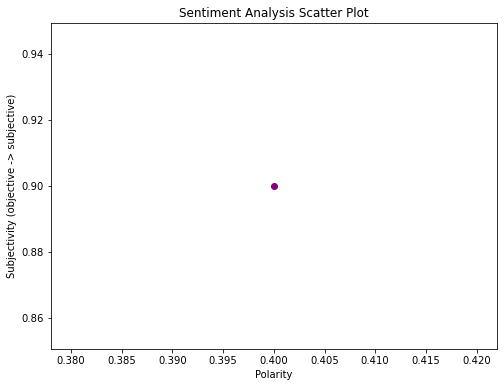

In [27]:
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectvity'][i], color='Purple')

plt.title('Sentiment Analysis Scatter Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity (objective -> subjective)')
plt.show()

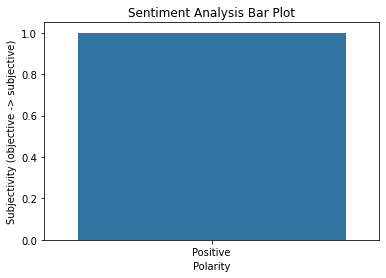

In [28]:
df['Sentiment'].value_counts()
sns.countplot(df['Sentiment'])
plt.title('Sentiment Analysis Bar Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity (objective -> subjective)')
plt.show()

In [15]:
positive_tweet = df[df['Sentiment'] == 'Positive']['cleantweets']
neutral_tweet = df[df['Sentiment'] == 'Neutral']['cleantweets']
negative_tweet = df[df['Sentiment'] == 'Negative']['cleantweets']

In [16]:
positive_tweet

0    Completion of M.PhilThe oral exam was also com...
Name: cleantweets, dtype: object

In [17]:
for line in positive_tweet:
#     print(line)
    for token in line.split():
        print(token)

Completion
of
M.PhilThe
oral
exam
was
also
completedMany
thanks
to
my
teacher,
Dr.
Khalid
Amin,
for
teaching
fict…


In [62]:
pos_tokens = [token for line in positive_tweet  for token in line.split()]
neg_tokens = [token for line in negative_tweet  for token in line.split()]
neut_tokens = [token for line in neutral_tweet  for token in line.split()]

In [63]:
from collections import Counter
def get_tokens(docx,num=30):
    word_tokens = Counter(docx)
    most_common = word_tokens.most_common(num)
    result = dict(most_common)
    return result
get_tokens(pos_tokens)

{'to': 67,
 'the': 63,
 'a': 59,
 'Data': 53,
 'in': 52,
 'and': 42,
 'of': 33,
 'our': 30,
 'is': 29,
 'you': 25,
 'Analyst': 24,
 'for': 23,
 'are': 21,
 'new': 20,
 'job': 19,
 'We': 18,
 'data': 14,
 'hiring': 14,
 'link': 13,
 'about': 12,
 '…': 12,
 'be': 11,
 'at': 10,
 'Click': 10,
 'bio': 10,
 'The': 10,
 'Join': 9,
 'excited': 9,
 'great': 9,
 'Want': 8}

In [64]:
most_common_pos_words = get_tokens(pos_tokens)
most_common_neg_words = get_tokens(neg_tokens)
most_common_neut_words = get_tokens(neut_tokens)

In [65]:
def plot_wordcloud(docx):
    plt.figure(figsize=(20,10))
    mywordcloud = WordCloud().generate(docx)
    plt.imshow(mywordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [66]:
pos_docx = ' '.join(pos_tokens)
neg_docx = ' '.join(neg_tokens)
neu_docx = ' '.join(neut_tokens)

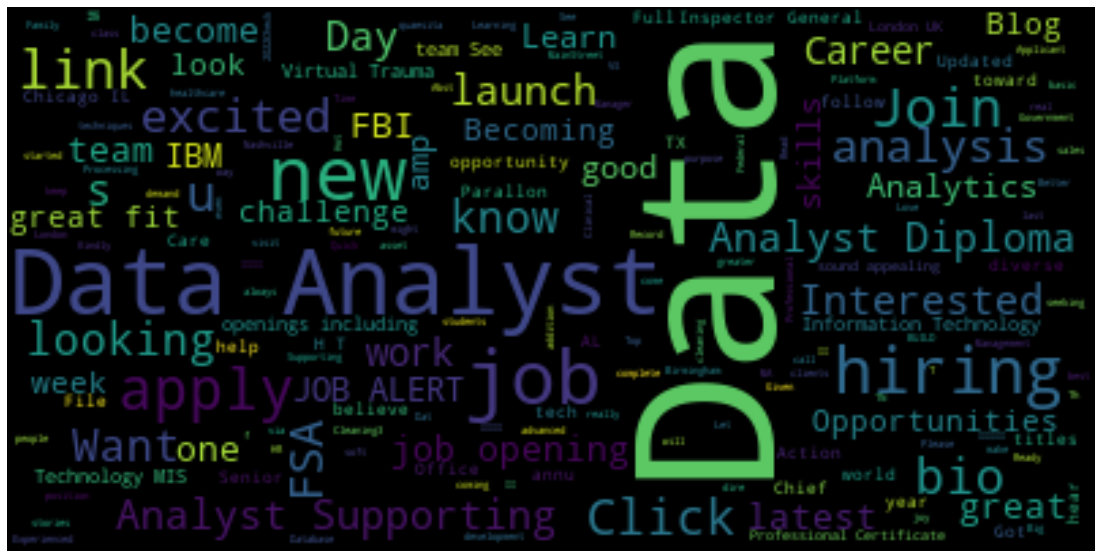

In [67]:
plot_wordcloud(pos_docx)

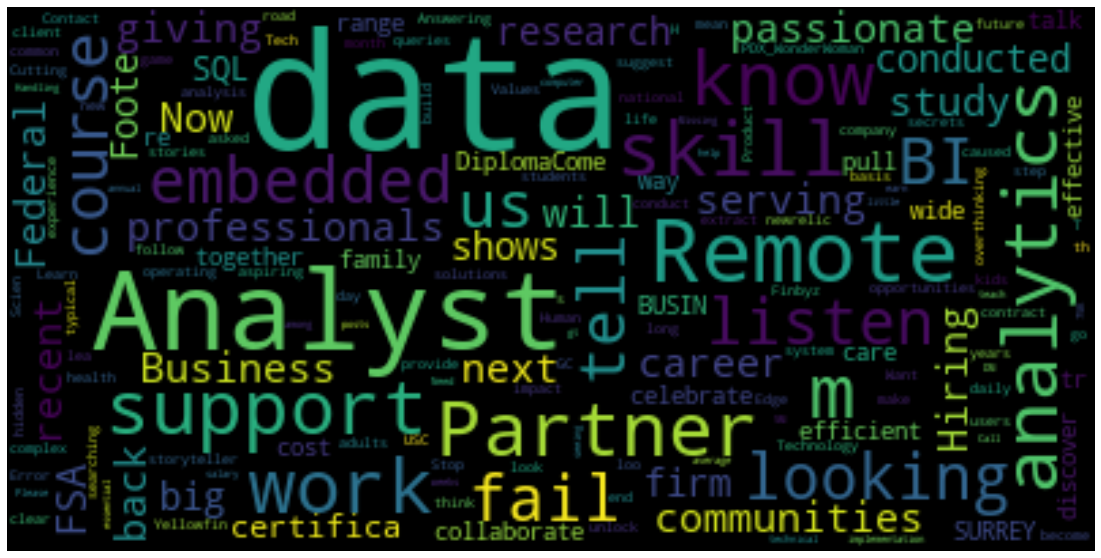

In [68]:
plot_wordcloud(neg_docx)

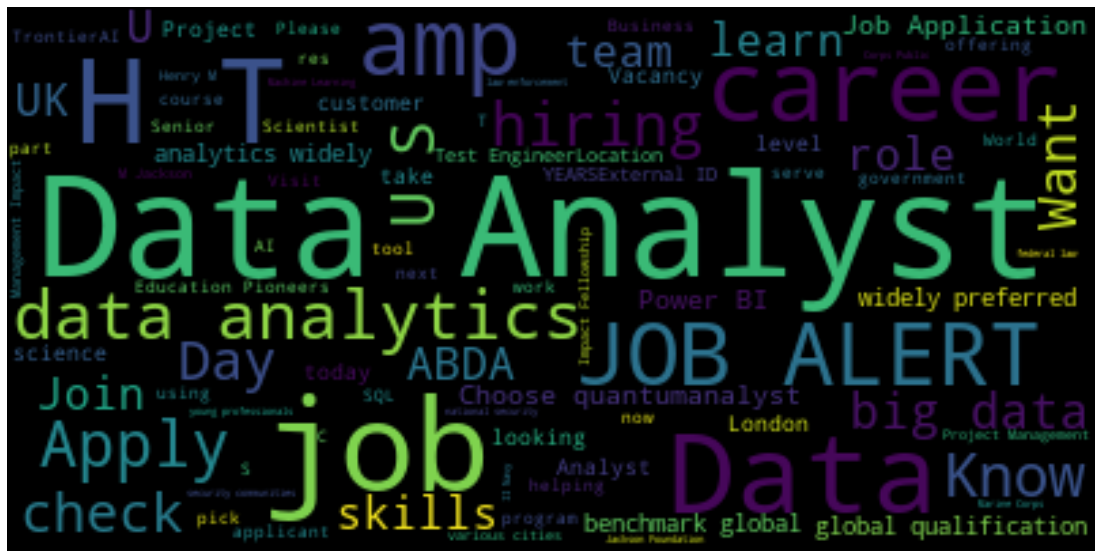

In [69]:
plot_wordcloud(neu_docx)